### Over-persistent Bias in Income Expectation and Consumption 

- Tao Wang and Julien Acalin 
- Topics of Advanced Macroeconomics by Professor Chris Carroll

What does this notebook do?



- We replicate this [notebook](https://github.com/econ-ark/DemARK/blob/master/notebooks/IncExpectationExample.ipynb) using dolo. The original notebook used HARK to explore the implications for a consumption saving problem with AR1 income process when the agents perceive the permanent income more persistent than actual income process. 


In [31]:
from dolo import *
import matplotlib.pyplot as plt
import seaborn
from matplotlib import pyplot as plt

In [32]:
model = yaml_import("../models/consumption_savings_persistent_income.yaml")

To undertake the thought experiment, we first solve the decision rule of an agent the perceived persistence parameter. Then we simulate the model using the income process according to the actual persistence parameter. To make the comparison, we also compare the decision rules with different beliefs. 

In [33]:
CorrAct = 0.92   # actual rho
CorrPcvd =0.94   # perceived rho 
CorrPcvd1 =0.90  # underperceived rho

In [34]:
#### We first solve the decision rule using perceived $\rho$ greater than actual
model.exogenous.rho[0][0]=CorrPcvd # set rho to be corrPcvd
drPcvd = time_iteration(model)   # solve the decision rule based on perceived rho
tabPcvd = tabulate(model, drPcvd,'w') ## tabulate the decision rules in two scenarios

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  7.000e-01 |      nan |    0.071 |   5 |


    Did not converge


|   2 |  1.308e-01 |    0.187 |    0.169 |  10 |
|   3 |  7.789e-02 |    0.595 |    0.060 |   5 |
|   4 |  5.498e-02 |    0.706 |    0.080 |   5 |
|   5 |  4.184e-02 |    0.761 |    0.057 |   4 |
|   6 |  3.323e-02 |    0.794 |    0.154 |   4 |
|   7 |  2.714e-02 |    0.816 |    0.083 |   4 |
|   8 |  2.258e-02 |    0.832 |    0.061 |   4 |
|   9 |  1.904e-02 |    0.843 |    0.052 |   4 |
|  10 |  1.621e-02 |    0.851 |    0.087 |   4 |
|  11 |  1.390e-02 |    0.858 |    0.051 |   4 |
|  12 |  1.198e-02 |    0.862 |    0.049 |   4 |
|  13 |  1.037e-02 |    0.865 |    0.076 |   4 |
|  14 |  9.029e-03 |    0.871 |    0.136 |   4 |
|  15 |  7.850e-03 |    0.869 |    0.109 |   4 |
|  16 |  6.804e-03 |    0.867 |    0.057 |   4 |
|  17 |  5.836e-03 |    0.858 |    0.111 |   4 |
|  18 |  5.345e-03 |    0.916 |    0.063 |   5 |
|  19 |  5.489e-03 |    1.027 |    0.063 |   5 |
|  20 |  5.658e-03 |    1.031 |    0.094 |   5 |
|  21 |  5.845e-03 |    1.033 |    0.079 |   5 |
|  22 |  6.046e-03 |

In [35]:
#### We also solve the decision rule using perceived $\rho$ smaller than actual

model.exogenous.rho[0][0]=CorrPcvd1 # set rho to be corrPcvd
drPcvd1 = time_iteration(model)   # solve the decision rule based on perceived rho
tabPcvd1 = tabulate(model, drPcvd1,'w') ## tabulate the decision rules in two scenarios

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  7.000e-01 |      nan |    0.064 |   5 |
|   2 |  8.926e-02 |    0.128 |    0.171 |   8 |
|   3 |  5.459e-02 |    0.612 |    0.052 |   4 |
|   4 |  3.731e-02 |    0.683 |    0.067 |   4 |
|   5 |  2.706e-02 |    0.725 |    0.041 |   3 |
|   6 |  2.100e-02 |    0.776 |    0.039 |   3 |
|   7 |  1.655e-02 |    0.788 |    0.089 |   4 |
|   8 |  1.306e-02 |    0.789 |    0.072 |   4 |
|   9 |  1.065e-02 |    0.815 |    0.049 |   4 |
|  10 |  8.536e-03 |    0.802 |    0.065 |   4 |
|  11 |  6.898e-03 |    0.808 |    0.088 |   4 |
|  12 |  5.532e-03 |    0.802 |    0.071 |   4 |
|  13 |  5.363e-03 |    0.969 |    0.228 |   4 |
|  14 |  5.473e-03 |    1.021 |    0.087 |   4 |
|  15 |  5.403e-03 |    0.987 |    0.065 |   4 |
|  16 |  5.408e-03 |    1.001 |    0.072 |   4 |
|  17 |  5.432e-03 |    1.004 |    0.

In [36]:
#### then we also solve the decision rule using the actual $\rho$
model.exogenous.rho[0][0]=CorrAct # set rho to be the actual 
drRE = time_iteration(model)   # solve the decision rule under rational expectation 

tabRE = tabulate(model, drRE,'w')  ## tabulate the decision rules in two scenarios

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  7.000e-01 |      nan |    0.073 |   5 |


    Did not converge


|   2 |  1.064e-01 |    0.152 |    0.176 |  10 |
|   3 |  6.421e-02 |    0.604 |    0.061 |   4 |
|   4 |  4.436e-02 |    0.691 |    0.102 |   4 |
|   5 |  3.287e-02 |    0.741 |    0.138 |   3 |
|   6 |  2.597e-02 |    0.790 |    0.057 |   4 |
|   7 |  2.079e-02 |    0.800 |    0.049 |   4 |
|   8 |  1.690e-02 |    0.813 |    0.059 |   4 |
|   9 |  1.406e-02 |    0.832 |    0.070 |   4 |
|  10 |  1.170e-02 |    0.833 |    0.066 |   4 |
|  11 |  9.716e-03 |    0.830 |    0.049 |   4 |
|  12 |  8.164e-03 |    0.840 |    0.058 |   4 |
|  13 |  6.827e-03 |    0.836 |    0.085 |   4 |
|  14 |  5.660e-03 |    0.829 |    0.049 |   4 |
|  15 |  5.499e-03 |    0.972 |    0.059 |   4 |
|  16 |  5.494e-03 |    0.999 |    0.074 |   4 |
|  17 |  5.148e-03 |    0.937 |    0.073 |   4 |
|  18 |  5.182e-03 |    1.007 |    0.050 |   4 |
|  19 |  5.252e-03 |    1.014 |    0.052 |   4 |
|  20 |  5.354e-03 |    1.019 |    0.049 |   4 |
|  21 |  5.479e-03 |    1.023 |    0.049 |   4 |
|  22 |  5.621e-03 |

### Comparing the Decision Rules under Misperception and Rational Expectation

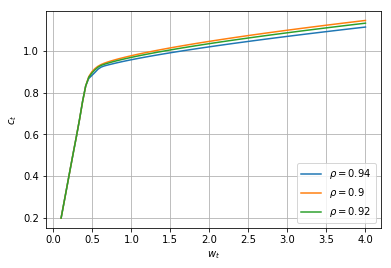

In [37]:
## plot the decision rule 
#stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
#plt.plot(tab['w'], tab['w'],'k--')
#plt.plot(tab['w'], stable_wealth,'k--)
plt.plot(tabPcvd['w'], tabPcvd['c'],label=r'$\rho={}$'.format(CorrPcvd))
plt.plot(tabPcvd1['w'], tabPcvd1['c'],label=r'$\rho={}$'.format(CorrPcvd1))
plt.plot(tabRE['w'], tabRE['c'],label=r'$\rho={}$'.format(CorrAct))
plt.xlabel(r"$w_t$")
plt.ylabel(r"$c_t$")
plt.legend(loc=0)
plt.grid()

#### Why does higehr perceived persistence lead to lower consumption?

This is due to precautionary saving motive. We know for any AR1 process $y_t=\rho y_{t-1} +\epsilon_t$, the unconditional variance

$$Var(y) = \frac{\sigma^2_\epsilon}{1-\rho^2}$$

Higher $\rho$, higher serial correlation of income leads to higher variance of income. This increases precautionary saving for given wealth. 

### Simulation 

We now simulate the model using the decision rule under perceived income process, but with the actual income process. 

In [38]:
## We have set the model back to actual rho, let's check
model.exogenous.rho[0][0]

0.92

Text(0.5, 1.0, 'Simulated Income Process under Actual Parameter')

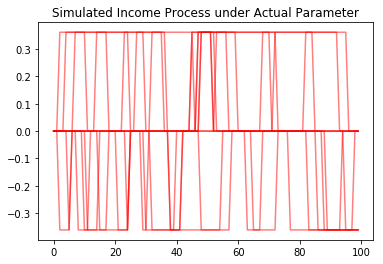

In [39]:
## parameters for simulation 
n_sim = 10
T_sim=100


## simulation 
dp = model.exogenous.discretize()   ## discretize is to generate income shocks by the exogeous process 
sim_shock = dp.simulate(n_sim, T_sim, i0=1)

# Plot the simulated ture income shocks

for i in range(n_sim):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)
plt.title('Simulated Income Process under Actual Parameter')

In [40]:
## now simulate with different decision rules 

sim = simulate(model, drPcvd, i0=1, N=100)  # simulate with the actual 
                                        # process but using the decision rule under misperception
sim_long = simulate(model, drPcvd, i0=1, N=1000, T=200) # simulate with the actual 
                                        # process but using the decision rule under misperception
sim_long1 = simulate(model, drPcvd1, i0=1, N=1000, T=200) # simulate with the actual 
                                        # process but using the decision rule under misperception
sim_long_RE = simulate(model, drRE, i0=1, N=1000, T=200) # simulate with the actual process 
                                                         # and rational expectation rule

### Simulated wealth distribution 

We care about the implication of the misperception on the wealth distribution. 

    Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


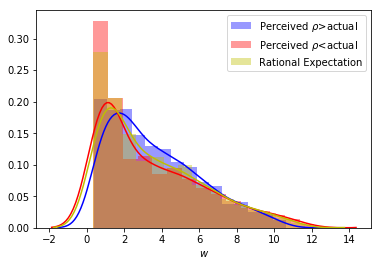

In [41]:
seaborn.distplot(sim_long.sel(T=199, V='w'),color='b',label=r'Perceived $\rho$>actual')
seaborn.distplot(sim_long1.sel(T=199, V='w'),color='r',label=r'Perceived $\rho$<actual')
seaborn.distplot(sim_long_RE.sel(T=199, V='w'), color='y',label='Rational Expectation')
plt.xlabel(r"$w$")
plt.legend(loc=0)

As shown above, if the income process is peceived to be more persistent, the precautionary saving motives make agents save more and shift the wealth distribution to the right. 